# Understanding Bias and Variance Tradeoff


## 1. Introduction
In this notebook, we will explore the concepts of bias and variance, which are crucial in understanding the performance of machine learning models. We will demonstrate these concepts using synthetic data, simple linear regression models, and cross-validation.

## 2. Importing Libraries

In [1]:
import numpy as np#Importa a biblioteca para operações numéricas e manipulação de arrays.
import pandas as pd#Importa a biblioteca pandas para manipulação e análise de dados
import matplotlib.pyplot as plt#importa a biblioteca para criar gráficos e visualizações.
from sklearn.linear_model import LinearRegression#Importa a classe para ajustar e prever com modelos de regressão linear.
from sklearn.preprocessing import PolynomialFeatures#Importa a classe para ajustar modelos de regressão polinomial.
from sklearn.metrics import mean_squared_error#Importa a função para calcular o MSE.
from sklearn.model_selection import train_test_split#Importa a função para dividir os dados em conjuntos de treino e teste.
from mlxtend.evaluate import bias_variance_decomp#Importa a função para decompor o erro do modelo.

## 3. Creating Synthetic Data

In [2]:
# Function to generate synthetic data
def generate_synthetic_data(n_samples=100, noise=1.0, random_seed=42):#define função para gerar amostras
    np.random.seed(random_seed)#Define a semente aleatória.
    X = np.linspace(0, 100, n_samples).reshape(-1, 1)#Cria uma matriz coluna com valores igualmente espaçados entre 0 e 100.
    true_function = -0.0001 * X**3 + 0.01 * X**2 + 0.1 * X + 1#Define a função verdadeira que gerará os valores alvo y
    y = true_function + np.random.normal(scale=noise, size=X.shape)#Gera os valores alvo y adicionando ruído gaussia
    return X, y, true_function#retorna os dados X, Y e a função verdadeira usada para gerar y.

# Generate synthetic data
X, y, true_function = generate_synthetic_data(n_samples=100, noise=2.0)#Chama a função generate_synthetic_data com 100 amostras e um nível de ruído de 2.0.

In [3]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)#

A divisão em conjuntos de treino e teste permite avaliar o desempenho do modelo de forma mais robusta. O modelo é treinado com X_train e y_train, e sua performance é avaliada em X_test e y_test. Isso ajuda a verificar a capacidade do modelo de generalizar para dados que ele não viu durante o treinamento.

## 4. Simple Linear Regression Model

In [4]:
# Training a simple linear regression model
lin_reg = LinearRegression()#ajustar uma linha reta aos dados de treino.
lin_reg.fit(X_train, y_train)#Ajusta o modelo aos dados de treino

# Predictions
y_train_pred = lin_reg.predict(X_train)#Usa o modelo treinado para prever os valores de y a partir do conj treino
y_test_pred = lin_reg.predict(X_test)#Usa o modelo treinado para prever os valores de y a partir do conj teste

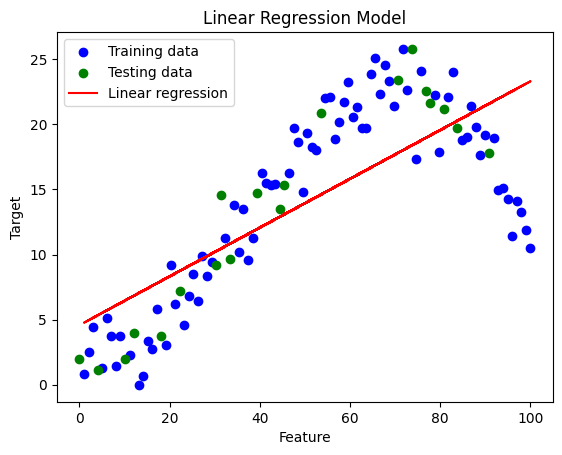

In [5]:
# Plotting the results
plt.scatter(X_train, y_train, color='blue', label='Training data')#Plota os pontos dos dados de treino em azul.
plt.scatter(X_test, y_test, color='green', label='Testing data')#Plota os pontos dos dados de teste em verde.
plt.plot(X_train, y_train_pred, color='red', label='Linear regression')#Plota a linha de regressão linear ajustada.
plt.xlabel('Feature')#Rotulo do eixo x
plt.ylabel('Target')#Rotulo do eixo y
plt.title('Linear Regression Model')#Define o titulo
plt.legend()#Adiciona legenda
plt.show()#Exibe o gráfico gerado.


In [6]:
# Calculating training and testing errors
train_error = mean_squared_error(y_train, y_train_pred)#Calcula o MSE para o conjunto de treino.
test_error = mean_squared_error(y_test, y_test_pred)#Calcula o MSE para o conjunto de teste.
print(f'Training Error: {train_error}')
print(f'Testing Error: {test_error}')
#Imprime os erros calculados para o conjunto de treino e o conjunto de teste.

Training Error: 24.57401812781828
Testing Error: 13.402241249399026


In this case, why training MSE is greater than test MSE?



---



## 5. Polynomial Regression Models

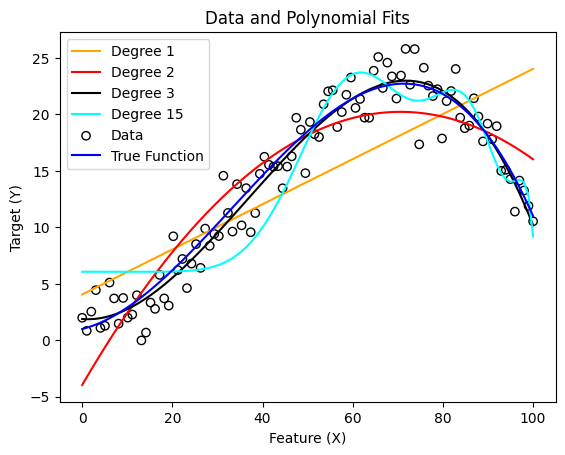

In [7]:
# Fit and plot polynomial models of different degrees
degrees = [1, 2, 3, 15]
colors = ['orange', 'red', 'black', 'cyan']#define as cores para cada degrau
predictions = []

for degree, color in zip(degrees, colors):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)#Cria um transformador que gera características polinomiais de grau especificado.
    X_poly = poly_features.fit_transform(X)#Transforma os dados X em características polinomiais.
    model = LinearRegression()
    model.fit(X_poly, y)#Ajusta um modelo de regressão linear aos dados polinomiais.
    y_poly_pred = model.predict(X_poly)#Faz previsões usando o modelo ajustado.
    predictions.append(y_poly_pred)
    plt.plot(X, y_poly_pred, label=f'Degree {degree}', color=color)#Plota a linha do polinômio ajustado para o grau especificado.

# Plot the synthetic data and the true function
plt.scatter(X, y, facecolors='none', edgecolors='black', label='Data')#Plota os dados sintéticos como pontos com bordas pretas e sem preenchimento.
plt.plot(X, true_function, label='True Function', color='blue')#Plota a função verdadeira que gerou os dados.
plt.xlabel('Feature (X)')#Define rotulo eixo x
plt.ylabel('Target (Y)')#Define rotulo eixo y
plt.title('Data and Polynomial Fits')#Define o titulo
plt.legend()#Exibe as legendas
plt.show()#Exibe o grafico

## 6. Bias-Variance Tradeoff

The bias-variance tradeoff is a fundamental concept in machine learning. It describes the tradeoff between two sources of error that affect the performance of a model:

- **Bias**: Error due to overly simplistic assumptions in the learning algorithm. High bias can cause the model to miss the relevant relations between features and target outputs (underfitting).
- **Variance**: Error due to too much complexity in the learning algorithm. High variance can cause the model to model the random noise in the training data (overfitting).

To visualize the bias-variance tradeoff, we can plot the training and testing errors for models of varying complexity.

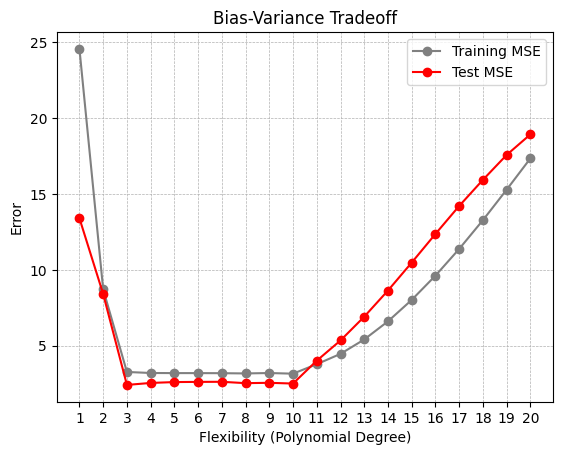

In [8]:
# Calculate and plot training and test MSE
train_errors = []#Armazena os erros de treinamento para diferentes graus.
test_errors = []#Armazena os erros de teste para diferentes graus.
flexibility = []#Armazena os graus dos polinômios

for degree in range(1, 21):
    poly_features = PolynomialFeatures(degree=degree, include_bias=False)#Cria características polinomiais para o grau atual.
    X_train_poly = poly_features.fit_transform(X_train)#Dados de treinamento transformados em características polinomiais.
    X_test_poly = poly_features.fit_transform(X_test)#Dados de teste transformados em características polinomiais.

    model = LinearRegression()
    model.fit(X_train_poly, y_train)#Ajusta o modelo aos dados de treinamento.

    y_train_pred = model.predict(X_train_poly)#Previsões para os conjuntos de treinamento.
    y_test_pred = model.predict(X_test_poly)#Previsões para os conjuntos de teste.

    train_errors.append(mean_squared_error(y_train, y_train_pred))#Calcula e armazena o MSE de treinamento.
    test_errors.append(mean_squared_error(y_test, y_test_pred))#Calcula e armazena o MSE de teste.
    flexibility.append(degree)#Armazena o grau do polinômio.

plt.plot(flexibility, train_errors, label='Training MSE', color='gray', marker='o')#Plota o erro de treinamento para diferentes graus de polinômio.
plt.plot(flexibility, test_errors, label='Test MSE', color='red', marker='o')#Plota o erro de teste para diferentes graus de polinômio.
plt.xlabel('Flexibility (Polynomial Degree)') #Define os rótulos do eixo x.
plt.ylabel('Error')#Define os rótulos do eixo y.
plt.title('Bias-Variance Tradeoff')#Define o titulo.
plt.xticks(flexibility)  # Exibe valores inteiros dos graus no eixo x.
plt.legend()#Exibe as legendas
plt.grid(True, which='both', linestyle='--', linewidth=0.5)#Adiciona uma grade ao gráfico.
plt.show()# Exibe o gráfico.

## 7. Conclusão

O notebook ajuda a entender como o viés e a variância influenciam o desempenho dos modelos. Viés refere-se à capacidade do modelo de capturar a complexidade dos dados, enquanto variância refere-se à sensibilidade do modelo a pequenas flutuações nos dados de treinamento.

A comparação entre regressão linear (modelo de baixo grau) e regressão polinomial (modelo de alto grau) ilustra como a complexidade do modelo afeta o viés e a variância. Modelos simples podem ter alto viés e baixo erro de teste, enquanto modelos complexos podem ter baixo viés mas alto erro de teste devido ao sobreajuste.

O gráfico que mostra o erro de treinamento e teste em função do grau do polinômio é uma ferramenta poderosa para visualizar como o ajuste do modelo (flexibilidade) impacta a capacidade de generalização.

Portanto encontrar o equilíbrio entre viés e variância é fundamental para criar modelos robustos. Modelos que são muito simples podem não capturar padrões importantes, enquanto modelos muito complexos podem ser sensíveis ao ruído nos dados. A gestão adequada desse trade-off resulta em modelos que são melhores em prever dados novos e não vistos.